In [1]:
from pyspark.sql import SparkSession
from datetime import datetime, timedelta

N_CUTS = 8
START_DATE = datetime.strptime("2018-01-01", "%Y-%m-%d")
END_DATE = datetime.strptime("2019-09-01", "%Y-%m-%d")

META = ["id", "partition_id", "title"]
DEGREE = ["degree", "inDegree", "outDegree"]
SIGN = [f"sign_{i}" for i in range(N_CUTS)]
VECTOR = [f"fiedler_{i}" for i in range(N_CUTS)]
DATES = [
    (START_DATE + timedelta(t)).strftime("%Y-%m-%d")
    for t in range((END_DATE - START_DATE).days)
]

SCHEMA = META + DEGREE + SIGN + VECTOR + DATES
pretty_columns = META + DEGREE + SIGN[:1] + VECTOR[:1] + DATES[:3]


spark = SparkSession.builder.getOrCreate()
df = spark.read.parquet("../data/design_matrix/sample_1_8_50")

In [2]:
df.select(pretty_columns).where("id = '16437'").show(vertical=True, n=100, truncate=False)

-RECORD 0------------------------------
 id           | 16437                  
 partition_id | ooxxoooo               
 title        | Reinforcement_learning 
 degree       | 288                    
 inDegree     | 135                    
 outDegree    | 153                    
 sign_0       | false                  
 fiedler_0    | -1.8320626091157155E-6 
 2018-01-01   | null                   
 2018-01-02   | 101                    
 2018-01-03   | null                   



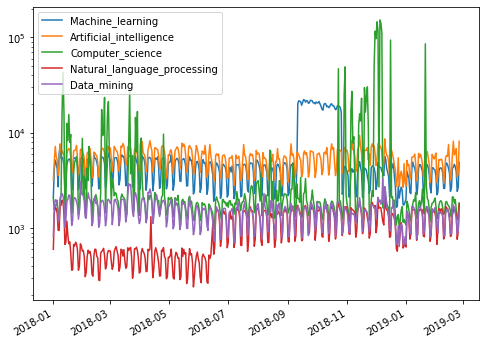

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

mapping = pd.read_csv("../sample_data/trial_6/mapping.csv")
ts = pd.read_csv("../sample_data/trial_6/ts.csv")
g = nx.from_pandas_edgelist(
    pd.read_csv('../sample_data/trial_6/edges.csv'), 
    source="src", 
    target="dst",
    edge_attr="weight",
    create_using=nx.DiGraph
)
pdf = pd.merge(mapping[["id", "pagerank", "title"]], ts, on="id")

k = 5
dates = pd.to_datetime(pdf.columns[3:423])
labels = pdf.title[:k].values
X = pdf.iloc[:k,3:423].fillna(0).values.T

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(dates, X)
plt.yscale("log")
ax.legend(labels)
fig.autofmt_xdate()
plt.show()

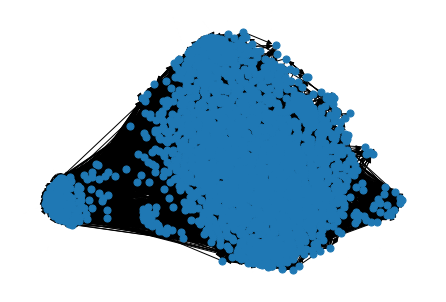

In [8]:
nx.draw(g, node_size=50)
plt.show()

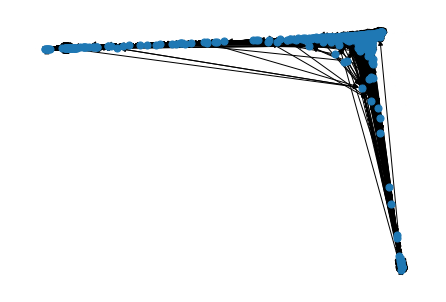

In [9]:
nx.draw_spectral(g, node_size=50)
plt.show()

In [59]:
from wikicast.data import laplacian_embedding

edges = pd.read_csv("../data/results/sampled_1/edges.csv")
ts = pd.read_csv("../data/results/sampled_1/ts.csv")

g = nx.subgraph(
    nx.from_pandas_edgelist(
        edges, source="src", target="dst", create_using=nx.Graph
    ),
    ts.id,
)

In [61]:
emb = laplacian_embedding(g, 16)
emb.shape

(37668, 16)

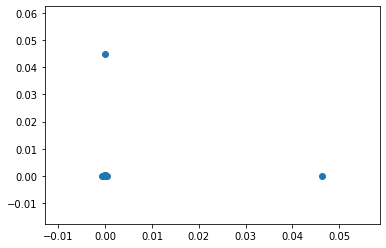

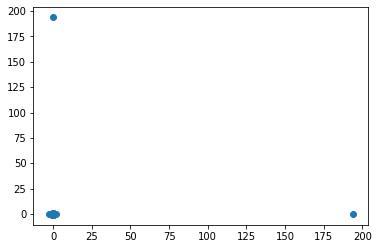

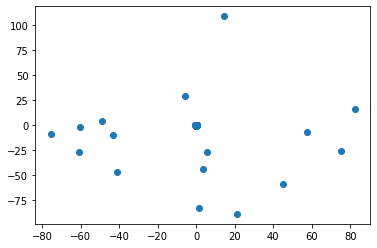

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=2)

z = emb

plt.scatter(z[:,0], z[:, 1])
plt.show()

z = scaler.fit_transform(z)

plt.scatter(z[:,0], z[:, 1])
plt.show()

G = pca.fit_transform(z)
plt.scatter(G[:,0], G[:, 1])
plt.show()


In [ ]:
nx.draw(g)